# Advanced Statistics and Hypothesis Testing

## What is a hypothesis?

It's a statement that proposes a possible explanation for an observed phenomenon or relationship in the data, which data scientists or statisticians can evaluate through investigation or hypothesis testing. 

Hypothesis Testing Process:
 
![involves.PNG](https://s3.us-east-1.amazonaws.com/static2.simplilearn.com/lms/testpaper_images/ADSP/Advanced_Statistics/involves.PNG)


## Hypothesis Components
We have 2 components:
![Linear1hypothes.png](https://s3.us-east-1.amazonaws.com/static2.simplilearn.com/lms/testpaper_images/ADSP/Advanced_Statistics/Linear1hypothes.png)

**Example** If you don't clean your fish tank once every 3 days, the fish will probably not survive for more than 3 months:
- **Independent Vairable** "don't clean your fish tank once every 3 days"
- **Dependent Variable**  "the fish will probably not survive for more than 3 months"

Other examples: If overall quality goes up (independent), the price goes up as well (dependent).

A good hypothesis must:
1. Explicitly state the **independent** and **dependent** variables 
2. Must be testable/reproducible
3. Be based on authentic research work and sample collection

## Hypothesis Testing
- It's the statistical process of determining whether there's enough evidence in a sample of data or not (making sure a certain assessment holds true or not)
- Key concepts of Hypothesis Testing:
    - **Null Hypothesis** ($H_0$)
        - It's a statement of no effect or no difference
        - It's the default assumption that there's no change, difference, or relationship
        - Example:
            - There's no correlation between Overall Quality and Sale Price
            - There's no difference between the average score of two different teaching methods
    - **Alternative Hypothesis** ($H_a$ or $H_1$)
        - It's the statement that you want to prove that there's a statistically significant evidence
        - It's what you want to prove to be correct if you have an assumption 
        - Example:
            - There's a correlation between Overall Quality and Sale Price
            - There's a difference between the average score of two different teaching methods
    - **Significance Level** $\alpha$
        - Is the probability for rejecting the null hypothesis
        - In the industry, we usually use 0.05 or 5% (sometimes 0.01 or 1% for extremely confident results)
    - **p-value** 
        - The probability of a statement from the sample being true
    
- Once we have all the components above defined, we can perform the Hypothesis Evaluation using the following steps:
    1. Define the statement of the hypothesis
    2. Format the statement into $H_0$ and $H_a$ ($H_0$ is always against your hypothesis)
    3. Choose the appropriate statistical test:
        - t-test
        - z-test
        - chi-square
        - ANOVA
        - Other: MANOVA or Mann-Whitney U test
    4. Set the $\alpha$ (typically 5%) can be set by you, your manager, stakeholders, or the company's standards
    5. Calculate the _p-value_ using the appropriate statistical python function
    6. Based on --value, you can run the following evaluation:
        - If _p-value_ > $\alpha$, we **do not reject the null hypothesis**
        - If _p-value_ < $\alpha$, we **do reject the null hypothesis** (in other words, we accept the **alternative hypothesis**)

![h](https://userpage.fu-berlin.de/soga/soga-py/200/2070_hypothesis_tests/img/Generalized_figure_of_two_sided_test.png)

## t-test
### When to use?
- For 2 numerical variables or 1 numerical variable against a population parameter (mean)
- When the sample size is very small **(<=30)** OR the population's **standard deviation is unknown**

### Types of t-tests:
- **Independent sample t-test**: evaluation if 2 _independent, unrelated groups_ are different. e.g. a group that eats bananas have high levels of potassium vs a different group of people that doesn't eat bananas. 
    - For group 1 and group 2 we have:
        - $H_0$: $\mu_1 = \mu_2$ (there's no difference)
        - $H_a$: $\mu_1 \neq \mu_2$
- **Paired-sample t-test**: (relationship test) checks if the averages of 2 samples taken from the _same group_ are equal or not. It's mainly used for **before** and **after** analysis. .e.g Students that took an extra math session did better in their exam. You'e basically comparing the scores of the same students, just different state of time (before vs after)
    - For the same group, before (b) vs after (a), we have:
        - $H_0$: $\mu_b = \mu_a$ (there's no difference)
        - $H_a$: $\mu_b \neq \mu_a$
- **One-Sample t-test:** it evaluates if the average of a single group (sample) is different than the known population average(X) e.g. if the null hypothesis states that the average diabetes level in the state of Georgia is 200. Then, we collect a sample of Georgia residents and measure to evaluate against the claim.
    - For sample (a) and population mean (X):
        - $H_0$: $\mu_s = X$ (there's no difference)
        - $H_a$: $\mu_s \neq X$

`pip install scipy`

In [40]:
import pandas as pd
import numpy as np
import scipy.stats as sts

### Independent Sample t-test Exercise
**Scenario: A/B Testing for New Website Functionality**

Imagine you work for an e-commerce company, and your team is responsible for optimizing the company's website to increase user engagement and, ultimately, sales. The current design of the "Buy Now" button on the website is being tested against a new design to see if it leads to a higher conversion rate (or change in conversion rate).

Methodology:
1. Randomly select website users and split them into 2 groups A and B (independent groups)
2. Give group A the old website (old button) and group B the new one
3. Measure usage score
4. Perform an independent statistical test whether there's a difference in the engagement or not

- $H_0$: $\mu_A = \mu_B$ The new button is not making any difference in terms of usage (the old button is as effective as the new one)
- $H_a$: $\mu_A \neq \mu_B$ The new button is causing an impact on usage score

In [41]:
df = pd.read_csv('/Users/bassel_instructor/Documents/Datasets/AB_Testing_Website.csv')
df.head()

,Group_A,Group_B
0,38,47
1,34,48
2,35,50
3,35,49
4,35,46


In [42]:
# run the t-test analysis
t_stat, p_val = sts.ttest_ind(df['Group_A'], df['Group_B'])

print(p_val)

8.2568977246166655e-22


In [43]:
# critical value of 5%
alpha = 0.05

In [44]:
#evaluation logic
if p_val > alpha:
    print('We do not reject the null hypothesis. Therefore, there is no impact on the usage from the new button.')
else:
    print('We reject the null hypothesis. Therefore, there is an impact on the usage from the new button.')

We reject the null hypothesis. Therefore, there is an impact on the usage from the new button.


What if we want to test if the functionality is causing better engagement score (not just in-equal)

![hy](https://mverbakel.github.io/assets/one_vs_two_sided.png)

Then, the hypotheses definitions become:
- $H_0$: $\mu_A = \mu_B$ The new button is not making any difference in terms of usage (the old button is as effective as the new one)
- $H_a$: $\mu_B > \mu_A$ The new button is causing a positive impact on usage score

In [45]:
t_stat, p_val = sts.ttest_ind(df['Group_B'], df['Group_A'], alternative='greater')

#evaluation logic
if p_val > alpha:
    print('We do not reject the null hypothesis. ')
else:
    print('We reject the null hypothesis. Therefore, group B is causing better usage score.')

We reject the null hypothesis. Therefore, group B is causing better usage score.


> for ease of use, we can build a generalized hypothesis evaluation function to tell us whether we reject or accept the null hypotheiss.

In [46]:
def HypoTesting(p_val, alpha=0.05): #default to alpha = 5%, but can be changed by the user
    if p_val > alpha:
        print('We do not reject the null hypothesis.')
    else:
        print('We reject the null hypothesis.')

### Paired-sample t-test:

**Example** </br>
For a particular hospital, it is advertised that a particular chemotherapy session does not affect the patient's health 
based on blood pressure (BP).
It is to be checked if the BP before the treatment is equivalent to the BP after the treatment for the same patients.
Perform a statistical significance at alpha=0.05 to help validate the claim.

For the same group, before (b) vs after (a), we have:
- $H_0$: $\mu_b = \mu_a$ (there's no difference)
- $H_a$: $\mu_b \neq \mu_a$ (blood pressure is changing after chemo)

In [47]:
df = pd.read_csv('/Users/bassel_instructor/Documents/Datasets/blood_pressure.csv')
df.head()

,patient,sex,agegrp,bp_before,bp_after
0,1,Male,30-45,143,153
1,2,Male,30-45,163,170
2,3,Male,30-45,153,168
3,4,Male,30-45,153,142
4,5,Male,30-45,146,141


In [48]:
t_stat, p_val = sts.ttest_rel(df['bp_before'], df['bp_after'])

HypoTesting(p_val)

We reject the null hypothesis.


We reject the null hypothesis. Therefore, the blood pressure of the studied group is impacted after getting chemo. 

## One-sample t-test

For a particular organization, the average age of the employees was claimed to be 30 years.
The authorities collected a random sample of 10 employees' age data to check the claim made by the organization.
Construct a hypothesis test to validate the hypothesis at a significance level of 5%.

- For sample (s) and population mean (X):
    - $H_0$: $\mu_s = X$ (there's no difference and the claim made by the organization is true)
    - $H_a$: $\mu_s \neq X$

In [49]:
df = pd.read_csv('/Users/bassel_instructor/Documents/Datasets/Ages.csv')
df.head()

,ages
0,34
1,45
2,65
3,78
4,32


In [50]:
t_stat, p_val = sts.ttest_1samp(df['ages'], popmean=30)

In [51]:
HypoTesting(p_val)

We reject the null hypothesis.


Since we reject the null hypothesis, we can say that the old information about population average age is not accurate.

## z-test

When to use?
- For 2 numerical variables or 1 numerical variable against the population parameters (mean)
- When the sample size is large (>30) AND the standard deviation of the population is known

**Exercise**
 
A school principal claims that the students in his school are more intelligent than those of other schools. A random sample of 50 students' IQ scores has a mean score of 110. The mean population IQ is 100 with a Standard deviation of 15. State whether the claim of the principal is right or not at a 5% significance level.

1. Define the hypothesis statement:
- $H_0$: $\mu_s = X$ There's no difference/change for the average IQ between the principal's school and other schools. (the principal's statement is incorrect)
- $H_a$: $\mu_s \neq X$

In [52]:
#extract information - givens

#evaluation info
alpha = 0.05

#population info (parameters)
pop_mean = 100
pop_sd = 15

#sample info (statistics)
sam_mean = 110
sam_size = 50

2. Observations
- we don't have access to the sample data. However, we have information about it and its population.
- Therefore, we can use the parameters and statistics to generate sample data for the students assuming a normal distribution
- Another piece of information that's missing is the **sample standard deviation**
- We can use the sample standard deviation formula from the population info

![Sd](https://uedufy.com/wp-content/uploads/2022/03/image-3.png)

$\sigma$ = population standard deviation
 
$\N$ = sample size

3. Calculate the Standard Deviation of the Sample

In [53]:
import math

sam_sd = pop_sd/math.sqrt(sam_size)
print('SD of the sample:', sam_sd)

SD of the sample: 2.1213203435596424


4. Generate a normally distributed sample data based on the derived or given statistics

In [54]:
student_sample = np.random.normal(loc=sam_mean, scale=sam_sd, size=sam_size)
student_sample

array([105.81919708, 109.37734456, 112.16245606, 114.00187584,
       110.52057077, 110.54452379, 112.31353327, 111.66194612,
       110.00774062, 113.35047938, 112.86279587, 108.25787205,
       113.15110548, 104.05061831, 110.12111386, 106.66979331,
       110.93997102, 111.87157224, 110.40263406, 105.1057555 ,
       107.56141168, 109.35424759, 110.19275138, 111.461068  ,
       109.25779142, 110.64585893, 108.50179673, 107.88963398,
       110.53553366, 108.16201739, 108.48601102, 111.28676094,
       109.14829187, 109.86695485, 110.64049683, 115.56764073,
       108.91088344, 109.60258369, 112.51681915, 111.44895272,
       110.25578264, 111.80823517, 110.02375733, 108.31194174,
       117.09251563, 109.25468438, 107.88180797, 110.86399702,
       107.88155996, 108.71154781])

In [55]:
len(student_sample)

50

In [56]:
np.mean(student_sample)

110.12632469690803

`pip install statsmodels`

5. Run the statistical evaluation

In [57]:
from statsmodels.stats.weightstats import ztest

In [58]:
z_stat, p_val = ztest(student_sample, value=pop_mean)

In [59]:
HypoTesting(p_val)

We reject the null hypothesis.


I think principal could be correct. school intelligence could be better or worse

Let's investigate further and find out if its greater or smaller.

- $H_0$: $\mu_s = X$ There's no difference/change for the average IQ between the principal's school and other schools. (the principal's statement is incorrect)
- $H_a$: $\mu_s > X$ The principal's claim is correct

In [60]:
z_stat, p_val = ztest(student_sample, value=pop_mean, alternative='larger')
HypoTesting(p_val)

We reject the null hypothesis.


We reject the null hypothesis. Therefore, the principal's claim is correct.

## Chi-square Test

![c](https://www.easysevens.com/wp-content/uploads/2024/01/Chi-Squared-Distribution.png)

- Chi-square distribution $\chi^2$ is a continuous probability 
- It's used for hypothesis testing and relationship test
- Null vs Alternative Hypothesis:
    - $H_0$: There is no relationship between the two variables
    - $H_a$: There is a relationship 

**Example**
 
Let's say we gathered a survey for favorite car color between men and women. We want to find out if there's an association between gender and favorite car color.

- $H_0$: There is no relationship between gender and favorite car color
- $H_a$: There is a relationship 

In [61]:
df = pd.read_csv('/Users/bassel_instructor/Documents/Datasets/Shopping.csv')
df.head()

,Gender,Car Color
0,M,Black
1,M,Silver
2,M,Red
3,M,Black
4,M,Black


In [62]:
#use value counts to confirm we have both M and F with equal/close distribution
df['Gender'].value_counts()

Gender
F    55
M    49
Name: count, dtype: int64

In [63]:
df['Car Color'].value_counts()

Car Color
Black     31
Silver    24
Pink      24
White     16
Red        9
Name: count, dtype: int64

Step 1: Build a crosstab (contingency table)

In [64]:
cont_table = pd.crosstab(df['Gender'], df['Car Color'])
cont_table

Car Color,Black,Pink,Red,Silver,White
Gender,,,,,
F,9,22,2,8,14
M,22,2,7,16,2


Step 2: using the `ch2_contingency` function, calculate the p-value

The result is an object(numpy array) containing attributes:
- statistic: float - The test statistic.
- p-value: float - The p-value of the test.
- dof: int - The degrees of freedom.
- expected_freq: ndarray, same shape as observed. The expected frequencies, based on the marginal sums of the table.

In [65]:
chi_stat, p_val, dof, exp_freq = sts.chi2_contingency(cont_table)

Step 3: Run the p-value vs alpha evaluation

In [66]:
HypoTesting(p_val)

We reject the null hypothesis.


- We reject the null hypothesis. Therefore, there's a relationship between car color and gender.
- We can double check that by inspecting the expected frequency table.

> You can stop here. The following is for educational purposes.

The expected frequency table tells us what the data should look like if there is NO relationship.

In [67]:
exp_freq

array([[16.39423077, 12.69230769,  4.75961538, 12.69230769,  8.46153846],
       [14.60576923, 11.30769231,  4.24038462, 11.30769231,  7.53846154]])

In [68]:
exp_freq_df = pd.DataFrame(data=exp_freq,
                           index=df['Gender'].unique(),
                           columns=df['Car Color'].unique())

exp_freq_df

,Black,Silver,Red,White,Pink
M,16.394231,12.692308,4.759615,12.692308,8.461538
F,14.605769,11.307692,4.240385,11.307692,7.538462


In [69]:
cont_table

Car Color,Black,Pink,Red,Silver,White
Gender,,,,,
F,9,22,2,8,14
M,22,2,7,16,2


## ANOVA
- Analysis of Variance
- It assesses whether the means of multiple groups are statistically significant from each other or not.
- t-test and z-test are limited to 2 variables/groups for evaluation - ANOVA can do 2 or more
- The statistical result of the ANOVA is called f-statistic (named after the mathematician Fischer)
- Types:
    - **One-way ANOVA** deals with one factor/measure for multiple groups. e.g. student IQ (factor) for 3 different class groups.
    - **Two-way ANOVA** deals with two factors/measures for multiple groups. e.g. student IQ and age (factors) for 3 different class groups.
    - **MANOVA** "Multi" ANOVA - deals with multi-factor/measure for multiple groups.
- Hypotheses statements:
    - $H_0$: There is no statistically significant difference between all groups
    - $H_a$: There is at least one group with a significant difference compared to other 

**Example** </br>
Suppose you are a researcher conducting an agricultural study to compare the yield of three different fertilizer treatments (Treatment A, Treatment B, and Treatment C) on a specific type of crop. You want to determine if there are significant differences in crop yields among the treatments.

In [70]:
df = pd.read_csv('/Users/bassel_instructor/Documents/Datasets/crop_yield_treatment.csv')
df.head()

,Treatment_A,Treatment_B,Treatment_C
0,50,56,49
1,54,47,57
2,57,55,46
3,49,41,40
4,46,56,54


Since we're analyzing one factor (crop yield), we use one-way ANOVA

In [71]:
f_stat, p_val = sts.f_oneway(df['Treatment_A'],df['Treatment_B'],df['Treatment_C'])

In [72]:
HypoTesting(p_val,alpha)

We do not reject the null hypothesis.


We accept the null hypothesis. There isn't a statistically significant difference between the treatments

## Mann-Whitney U Test
- There's a weakness with using z-tst and t-test if the data is irregular (not normally distributed) - light skewness is ok
- In a scenario where the distribution is inconsistent and far from the bell curve, we can use a **non-parametric** statistical evaluation, such as the Mann-Whitney U Test
- Non-parametric evaluation means  you cannot rely on traditional statistical measure (mean, median, etc...) for evaluation 
- Hypothesis statements:
    - $H_0$: there's no difference between group A and B
    - $H_a$: there's a difference between group A and B

**Example**</br>
Evaluate the salaries of post-graduate students from 2 different universities and check if they are different from each other (based on 5% critical value).

In [73]:
df = pd.read_csv('/Users/bassel_instructor/Documents/Datasets/Mann-Whitney_U_Salaries.csv')
df.head()

,UnivOfDallas,ArizonaStateUniv
0,71555,73589
1,67887,83621
2,84334,74681
3,70133,83873
4,89304,72350


array([[<Axes: title={'center': 'UnivOfDallas'}>,
        <Axes: title={'center': 'ArizonaStateUniv'}>]], dtype=object)

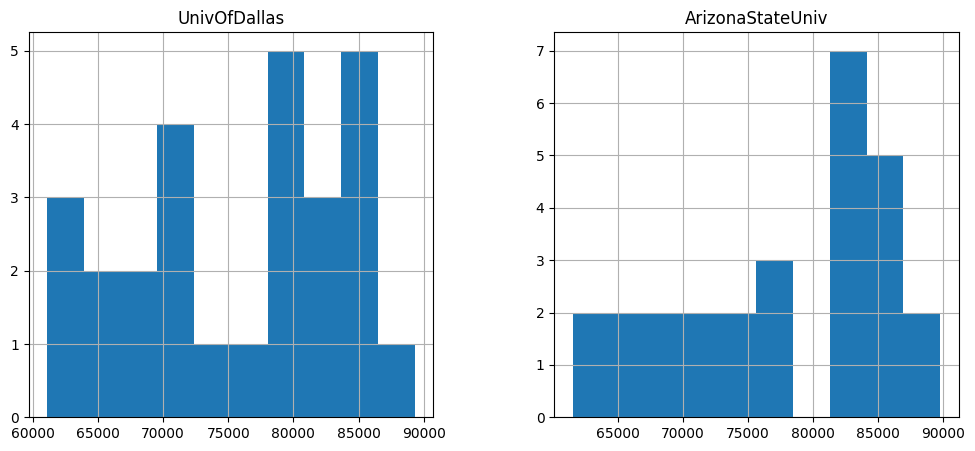

In [74]:
df.hist(figsize=(12,5))

Since the distribution is not normal/Gaussian, we cannot rely on a parametric test (t-test or z-test). Therefore, the Mann-Whitney U test is appropriate.

In [75]:
u_stat, p_val = sts.mannwhitneyu(df['UnivOfDallas'], df['ArizonaStateUniv'])

HypoTesting(p_val)

We do not reject the null hypothesis.


**Outcome** We accept the null hypothesis. Therefore, there's no significant difference between the 2 salary data of the universities